In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.linear_model import LinearRegression
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.style.use('ggplot') 


In [70]:
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
cats = pd.read_csv('item_categories.csv')
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [71]:
print("DATA HEAD\n\n",train.head())
train.describe();
print("\n")
train.info();
print("\n")
print("Train NULL values\n",train.isnull().sum());

DATA HEAD

          date  date_block_num  shop_id  item_id   item_price  item_cnt_day  \
0  28.12.2014              23       25    12179   959.000000           1.0   
1  23.04.2014              15       25    14042   149.000000           1.0   
2  03.03.2014              14       12    11373   106.615385          13.0   
3  08.12.2013              11       47    12107   599.000000           1.0   
4  23.01.2015              24       29     3341  2599.000000           1.0   

        ID  
0  2317582  
1  1576962  
2  1547382  
3  1255724  
4  2372492  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925849 entries, 0 to 2925848
Data columns (total 7 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
ID                int64
dtypes: float64(2), int64(4), object(1)
memory usage: 156.3+ MB


Train NULL values
 date              0
date_block_num    0
shop_id           0
item_id  

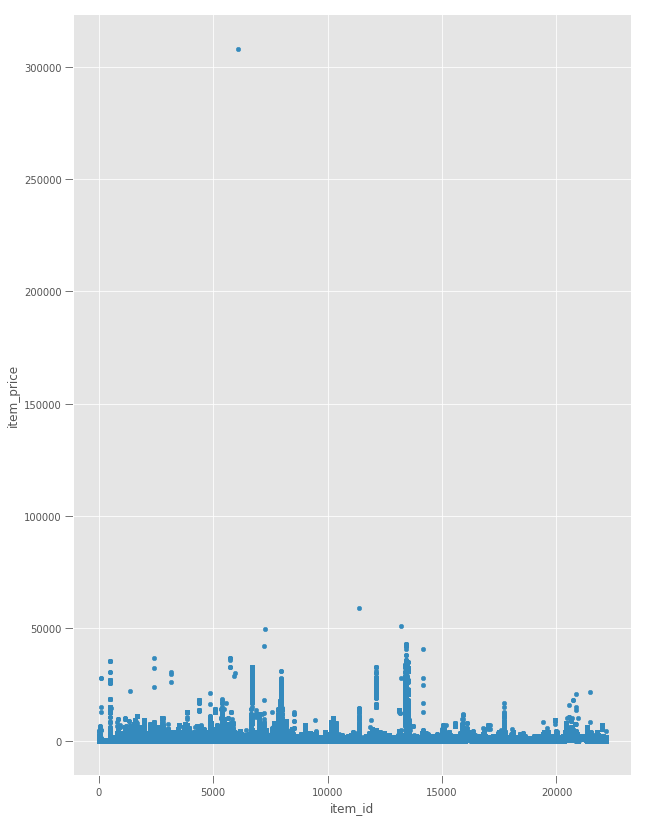

(2925849, 7)
(2925847, 7)


In [72]:
train.plot(kind="scatter", x="item_id", y="item_price", figsize=(10,14));
plt.show()
print(train.shape)
train = train[(train.item_price > 0) & (train.item_price < 300000)]
print(train.shape)

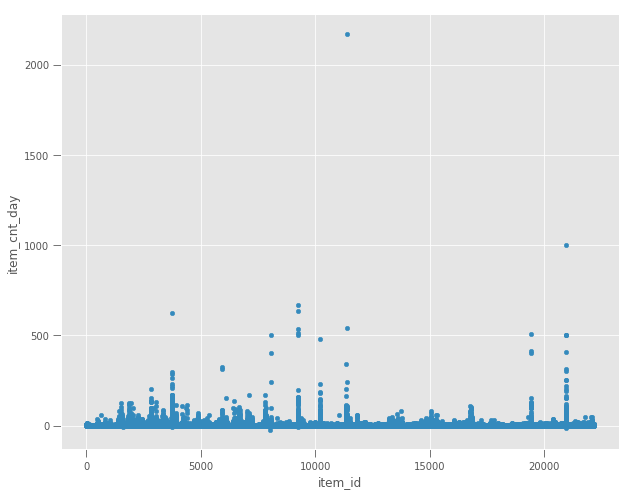

In [73]:
train.plot(kind="scatter", x="item_id", y="item_cnt_day", figsize=(10,8))
plt.show()

In [76]:
train.item_cnt_day[train['item_cnt_day']>999].value_counts()
train = train[(train.item_cnt_day> 0) & (train.item_cnt_day < 2000)]
print(train.shape)

(2918522, 7)


In [87]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
y=train['item_cnt_day']

In [88]:
y=y.reshape(-1,1)


/home/srujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [89]:
print (train.shape)

(2918522, 7)


In [90]:
x=np.hstack([train['date_block_num'].reshape(-1,1),train['shop_id'].reshape(-1,1),train['item_id'].reshape(-1,1),train['item_price'].reshape(-1,1)])

/home/srujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [91]:
x

array([[  2.30000000e+01,   2.50000000e+01,   1.21790000e+04,
          9.59000000e+02],
       [  1.50000000e+01,   2.50000000e+01,   1.40420000e+04,
          1.49000000e+02],
       [  1.40000000e+01,   1.20000000e+01,   1.13730000e+04,
          1.06615385e+02],
       ..., 
       [  2.30000000e+01,   3.10000000e+01,   3.39300000e+03,
          9.96070000e+02],
       [  3.00000000e+01,   3.10000000e+01,   2.00360000e+04,
          3.99000000e+02],
       [  2.30000000e+01,   4.70000000e+01,   1.53950000e+04,
          6.49000000e+02]])

In [92]:
lm.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
c_pred = lm.intercept_
c_pred

array([ 1.15023574])

In [98]:
m_pred = lm.coef_
m_pred
x_test=np.hstack([test['date_block_num'].reshape(-1,1),test['shop_id'].reshape(-1,1),test['item_id'].reshape(-1,1),test['item_price'].reshape(-1,1)])

/home/srujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
y_pred = lm.predict(x)
def loss(y, y_predicted):
    return np.mean(np.square(y-y_predicted))

In [108]:
loss(y,y_pred)

5.2595045184803944

In [ ]:
plt.plot(x, y_pred, 'r')
plt.show()